## Import libraries
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Conv2D
from tensorflow.keras.layers import MaxPooling2D, UpSampling2D
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [2]:
# Import the MNIST data
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

In [8]:
# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))



# Inject noise into the train and test datasets
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0,
size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0,
size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)




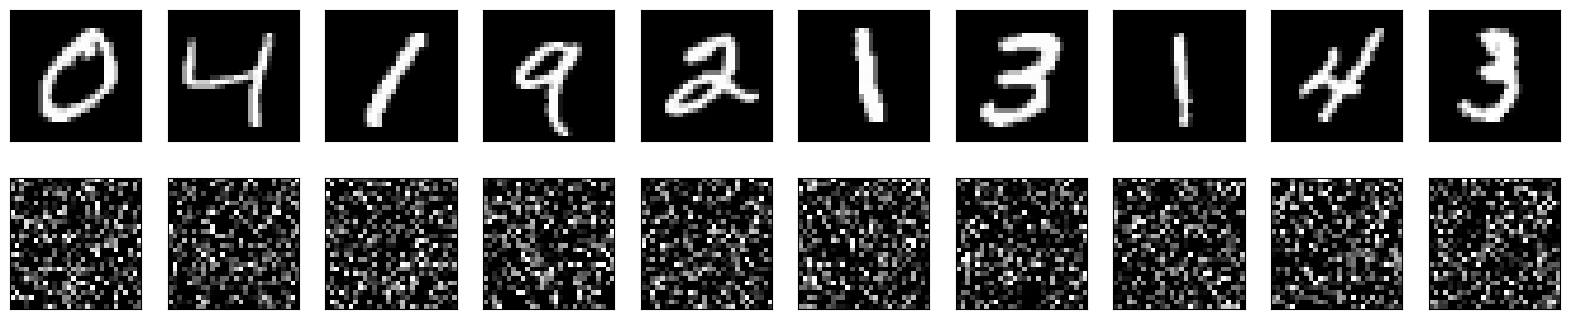

In [9]:
# Display a sample of 10 noisy images
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i+n)
    plt.imshow(x_train_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
# Defining the model
autoencoder_model = Sequential()
autoencoder_model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1),
activation='relu', padding='same'))
autoencoder_model.add(MaxPooling2D((2, 2), padding='same'))
autoencoder_model.add(Conv2D(32, (3, 3),
activation='relu', padding='same'))
autoencoder_model.add(MaxPooling2D((2, 2), padding='same'))
# at this point, the representation is (7, 7, 32) i.e., 128-dimensional
autoencoder_model.add(Conv2D(32, (3, 3),
activation='relu', padding='same'))
autoencoder_model.add(UpSampling2D((2, 2)))
autoencoder_model.add(Conv2D(32, (3, 3),
activation='relu', padding='same'))
autoencoder_model.add(UpSampling2D((2, 2)))
autoencoder_model.add(Conv2D(1, (3, 3), activation='sigmoid',
padding='same'))


# Compile model
autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
# fit model and save it
autoencoder_model.fit(x_train_noisy, x_train,
epochs=8, batch_size=128, shuffle=True,
validation_data=(x_test_noisy, x_test))
autoencoder_model.save('saved_models/denoising.h5')
decoded_imgs = autoencoder_model.predict(x_test_noisy)



Epoch 1/8
469/469 [==============================] - 101s 207ms/step - loss: 0.1647 - val_loss: 0.1159
Epoch 2/8
469/469 [==============================] - 99s 210ms/step - loss: 0.1130 - val_loss: 0.1087
Epoch 3/8
469/469 [==============================] - 96s 204ms/step - loss: 0.1075 - val_loss: 0.1045
Epoch 4/8
469/469 [==============================] - 96s 206ms/step - loss: 0.1043 - val_loss: 0.1029
Epoch 5/8
469/469 [==============================] - 103s 219ms/step - loss: 0.1024 - val_loss: 0.1009
Epoch 6/8
469/469 [==============================] - 95s 203ms/step - loss: 0.1011 - val_loss: 0.0997
Epoch 7/8
469/469 [==============================] - 105s 223ms/step - loss: 0.1001 - val_loss: 0.0991
Epoch 8/8
313/313 [==============================] - 4s 12ms/step


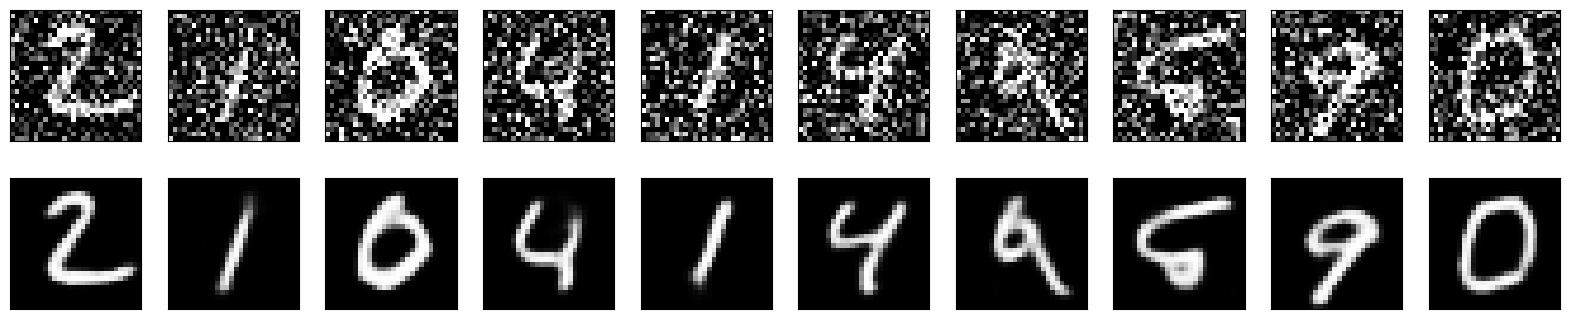

In [7]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()